# TP outil d’estimation de véhicules d’occasions

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

## Libraries import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from datetime import datetime
#from sklearn.model_selection import train_test_split

## Dataframe import

In [3]:
fpath = os.path.join('Data_cars.csv')
print(fpath)
df = pd.read_csv(fpath)

Data_cars.csv


## Dataframe exploration

In [4]:
df.shape

(166695, 9)

In [5]:
df.columns.tolist()

['Price',
 'Make',
 'Model',
 'Model_year',
 'Mileage',
 'Fuel',
 'Gearbox',
 'Online',
 'Description']

In [6]:
df.head(10)

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
0,11220.0,PEUGEOT,308,2014,94341.0 km,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ..."
1,57526.0,BMW,X6,2015,39051.0 km,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M..."
2,80379.0,AUDI,RS6,2014,75381.0 km,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II..."
3,2830.0,FORD,KA,2007,92282.0 km,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis..."
4,12925.0,FIAT,TIPO,2018,10.0 km,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ..."
5,27956.0,BMW,X3,2012,95623.0 km,Diesel,automatique,14/03/2018 à 4h24,"modele: X3 F25, version: (F25) XDRIVE35D 313 S..."
6,16888.0,AUDI,A3,2013,49018.0 km,Diesel,mécanique,16/04/2018 à 21h35,"modele: A3 (2E GENERATION) SPORTBACK, version:..."
7,18188.0,RENAULT,MEGANE,2017,9795.0 km,Diesel,automatique,29/04/2018 à 12h44,"modele: MEGANE 4 ESTATE, version: IV ESTATE 1...."
8,10594.0,FORD,C-MAX,2012,126670.0 km,Diesel,mécanique,22/06/2018 à 5h11,"modele: C-MAX 2, version: II 1.6 TDCI 115 FAP ..."
9,69131.0,MERCEDES,CLASSE C,2015,39439.0 km,Essence,automatique,08/03/2018 à 17h35,"modele: CLASSE C 4 AMG, version: (W205) 63 AMG..."


In [7]:
print (df.dtypes)

Price          float64
Make            object
Model           object
Model_year       int64
Mileage         object
Fuel            object
Gearbox         object
Online          object
Description     object
dtype: object


In [8]:
df['Mileage'] = df['Mileage'].map(lambda x : int(float(x[:-3])))
print (df.dtypes)

Price          float64
Make            object
Model           object
Model_year       int64
Mileage          int64
Fuel            object
Gearbox         object
Online          object
Description     object
dtype: object


In [9]:
df.at[2,'Description']

"modele: RS6 (3E GENERATION) AVANT, version: III AVANT 4.0 TFSI 560 QUATTRO TIPTRONIC, puissance_fiscale: 47, portes: 5.0, options: banquette arrière 3 places;écran tactile;témoin de bouclage des ceintures av;palettes au volant;volant cuir;régulateur limiteur de vitesse;commande climatisation ar;pack dynamique;cache bagages;sorties d'échappement chromées;affichage tête haute;rétroviseurs électriques;airbag frontal;banquette 1/3 - 2/3;vision périphérique (360°);commandes vocales;vitres teintées;GPS;services connectés;prise audio USB;stations de webradio;poignées ton carrosserie;pare-brise thermique;système d'éclairage intelligent;régulateur de vitesse;siège conducteur à mémoire;inserts de porte carbone;rétroviseurs extérieurs à mémoire;carte main libre;jantes alu;siège passager à réglages électriques;boucliers av et ar couleur caisse;phares av. de jour à LED;airbags rideaux;colonne de direction électr. à mémoire;applications bois noir avec inserts alu;accoudoir central arrière;climatisa

In [10]:
df.describe()

,Price,Model_year,Mileage
count,1.666950e+05,166695.000000,1.666950e+05
mean,1.933369e+04,2014.605387,4.689404e+04
std,1.642034e+04,8.304980,4.821007e+04
min,1.000000e+00,1900.000000,1.000000e+00
25%,1.128000e+04,2013.000000,9.169500e+03
50%,1.577400e+04,2016.000000,3.048500e+04
75%,2.270750e+04,2017.000000,7.335700e+04
max,1.486500e+06,5018.000000,1.418551e+06


In [11]:
df.isna().sum()

Price          0
Make           0
Model          0
Model_year     0
Mileage        0
Fuel           0
Gearbox        0
Online         0
Description    0
dtype: int64

Text(0.5, 1.0, 'Pice in terms of Mileage')

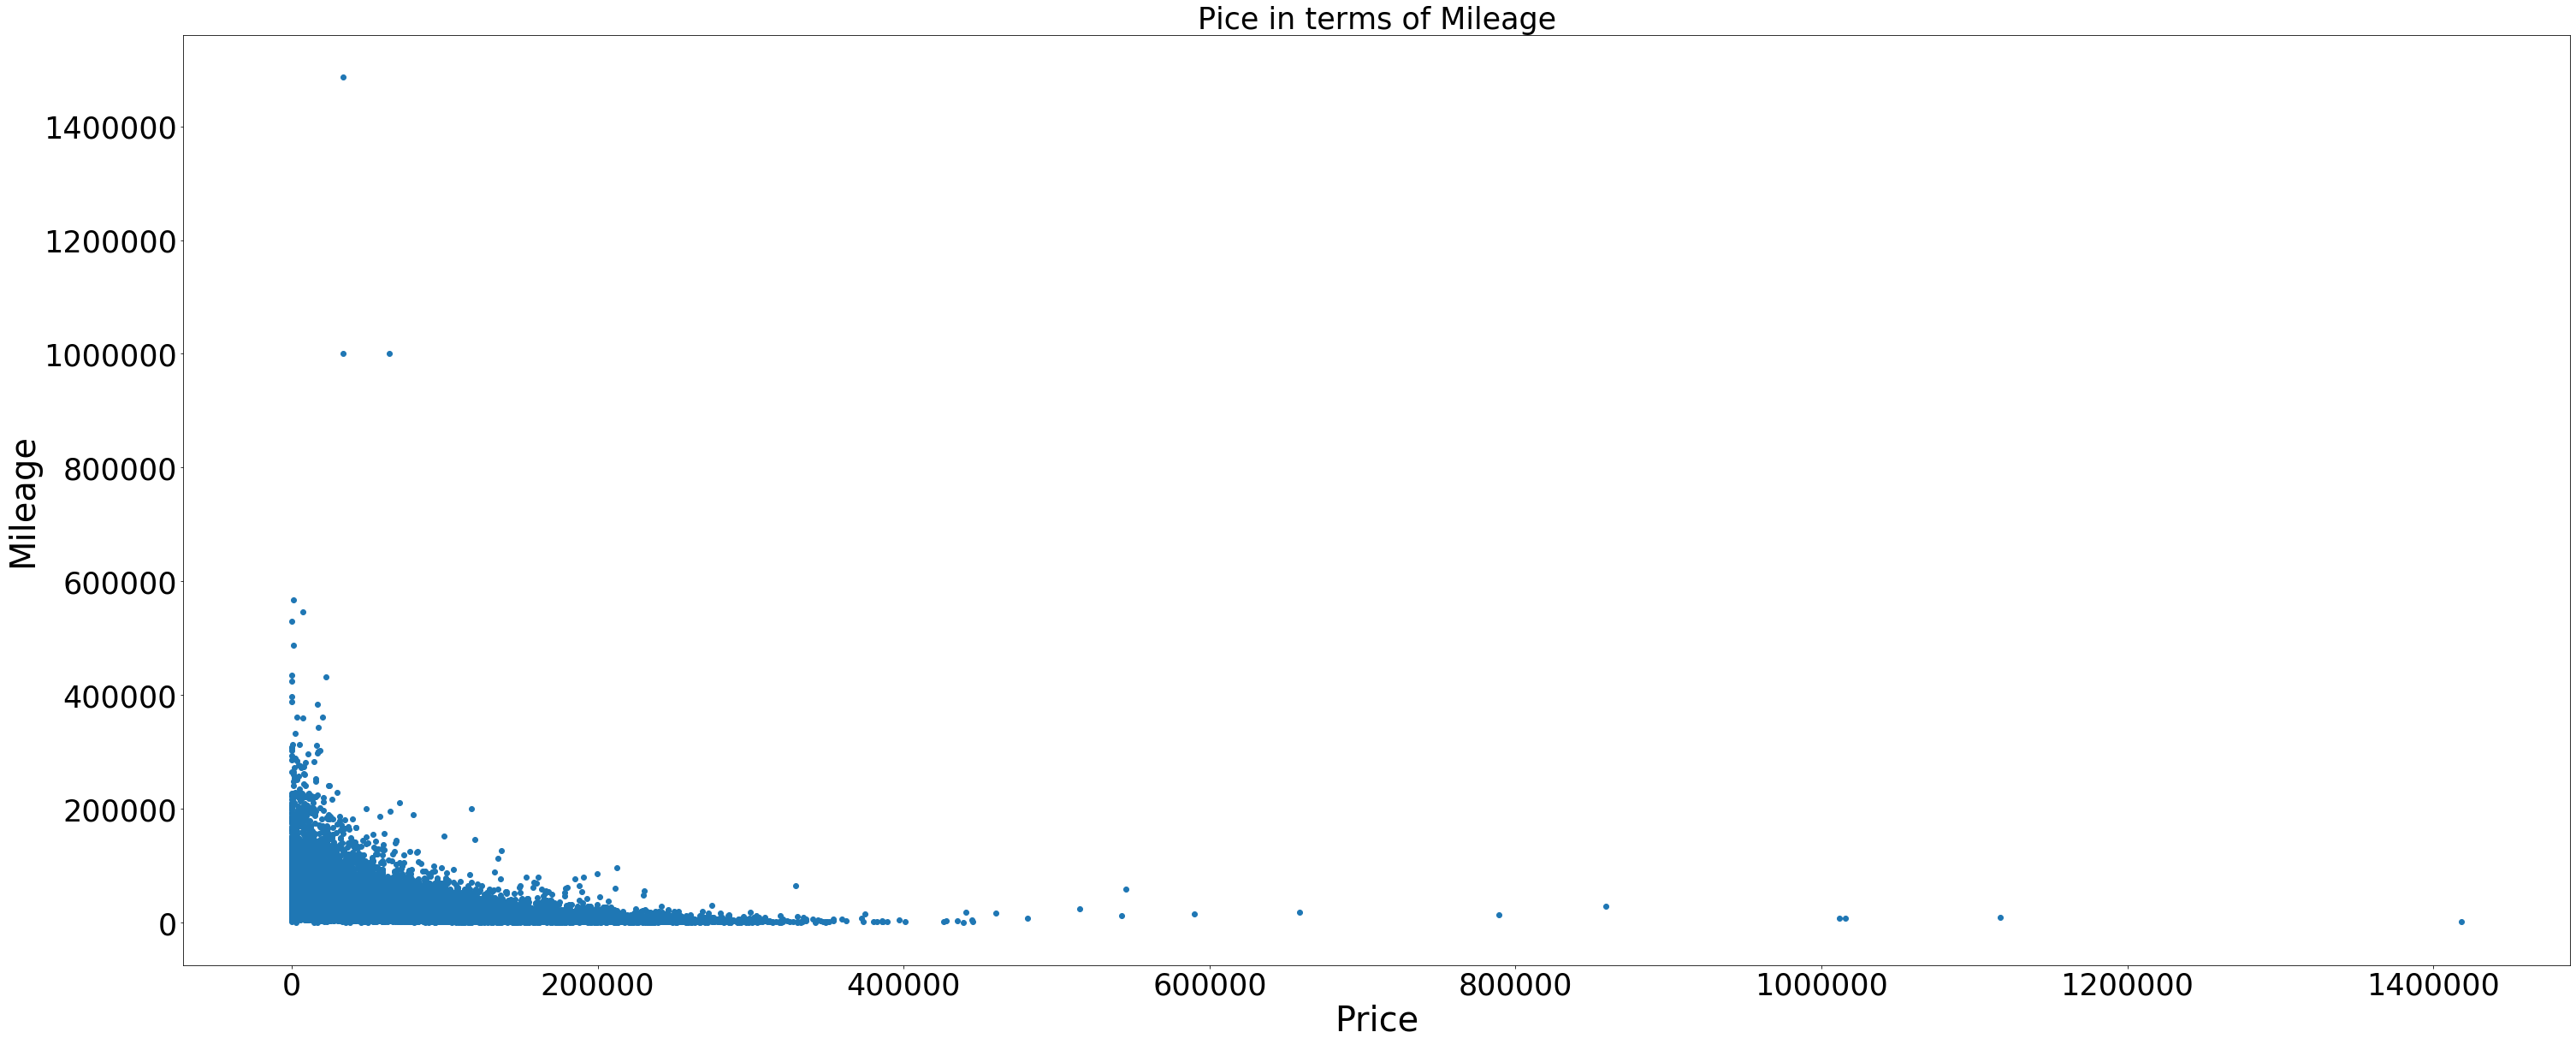

In [12]:
plt.figure(figsize=(50,20))
plt.scatter(df['Mileage'],df['Price'])
plt.xlabel("Price",size=40)
plt.xticks(size=35)
plt.ylabel("Mileage",size=40)
plt.yticks(size=35)
plt.title('Pice in terms of Mileage',size=35)

Text(0, 0.5, 'Number of cars')

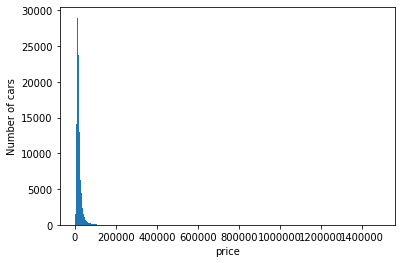

In [13]:
plt.hist(df['Price'],bins=500)
plt.xlabel("price",size=10)
plt.ylabel("Number of cars",size=10)

Text(0, 0.5, 'Number of cars')

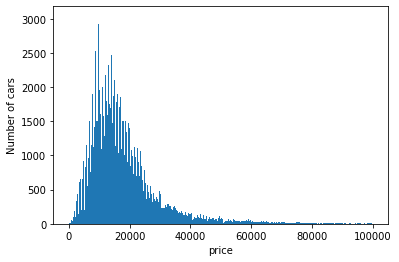

In [14]:
df2 = df.loc[df['Price'] < 100000]
plt.hist(df2['Price'],bins=500)
plt.xlabel("price",size=10)
plt.ylabel("Number of cars",size=10)

In [15]:
df['Make']=df['Make'].map(lambda x: x.strip())
df.Make.unique()

array(['PEUGEOT', 'BMW', 'AUDI', 'FORD', 'FIAT', 'RENAULT', 'MERCEDES',
       'SEAT', 'MINI', 'HYUNDAI', 'DACIA', 'VOLKSWAGEN', 'CITROEN',
       'TOYOTA', 'JAGUAR', 'OPEL', 'PORSCHE', 'NISSAN', 'LAND ROVER',
       'MAZDA', 'VOLVO', 'SKODA', 'DS', 'SSANGYONG', 'SUZUKI', 'HONDA',
       'LEXUS', 'INFINITI', 'JEEP', 'KIA', 'DODGE', 'ASTON MARTIN',
       'LANCIA', 'LOTUS', 'CHEVROLET', 'SMART', 'ALFA ROMEO', 'BUGATTI',
       'MITSUBISHI', 'MERCEDES-AMG', 'AIXAM', 'FERRARI', 'MG',
       'LAMBORGHINI', 'MASERATI', 'SUBARU', 'MORGAN', 'CHRYSLER',
       'ROLLS ROYCE', 'TESLA', 'ABARTH', 'LADA', 'BMW-ALPINA', 'SAAB',
       'PACKARD', 'CADILLAC', 'ROVER', 'SHELBY', 'MICROCAR', 'ALPINA',
       'BENTLEY', 'DAIHATSU', 'HUMMER', 'TRIUMPH', 'LIGIER', 'DAEWOO',
       'AUSTIN HEALEY', 'JIAYUAN', 'MCLAREN', 'AUSTIN', 'DANGEL',
       'CATERHAM', 'CHATENET', 'INTERMECCANICA', 'AC', 'AUTOBIANCHI',
       'SUNBEAM', 'MIA ELECTRIC', 'BOLLORE', 'MPM MOTORS', 'INNOCENTI',
       'MATRA', 'DONKERVOOR

In [16]:
#pd.set_option('display.max_rows', None)
df2=df.Make.value_counts()#normalize=True
df2=pd.Series.to_frame(df2)
df2.reset_index(inplace=True)
df2.columns=["Maker", "nbrCar"]
df2

,Maker,nbrCar
0,RENAULT,30690
1,PEUGEOT,26119
2,CITROEN,17609
3,VOLKSWAGEN,11241
4,BMW,9424
...,...,...
87,AC,1
88,MATRA,1
89,CATERHAM,1
90,BUGATTI,1


Text(0.5, 1.0, 'Number of cars per Mark')

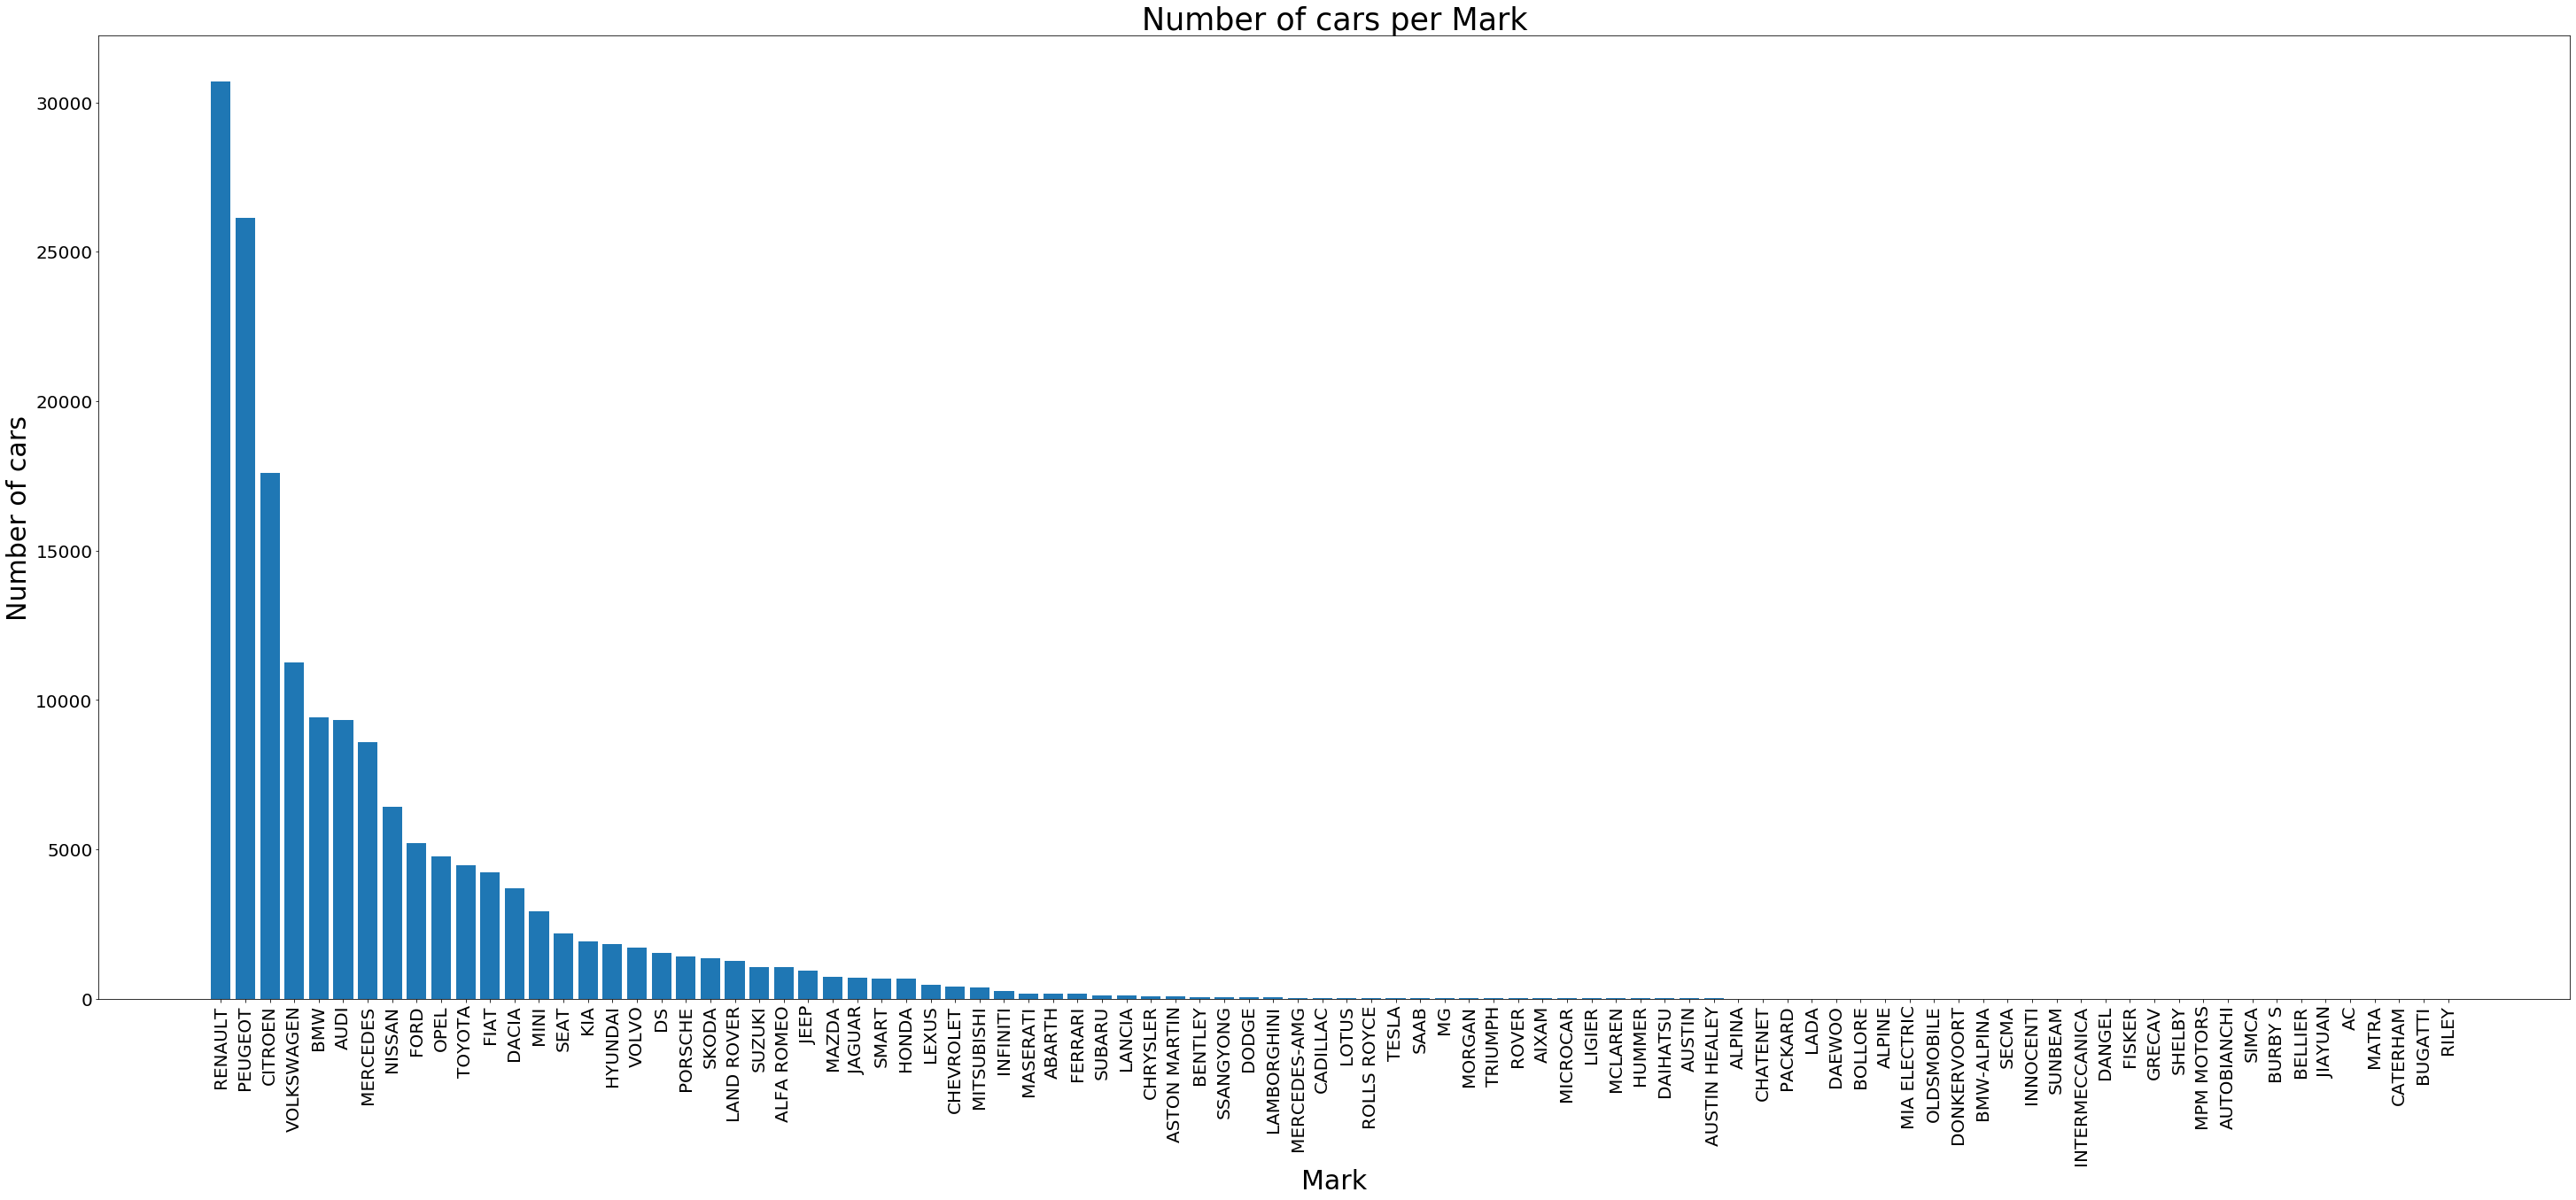

In [17]:
plt.figure(figsize=(50,20))
plt.bar("Maker", "nbrCar",data = df2)
plt.xlabel("Mark",size=30)
plt.xticks(rotation=90,size=20)
plt.ylabel("Number of cars",size=30)
plt.yticks(size=20)
plt.title('Number of cars per Mark',size=35)

Text(0, 0.5, '€')

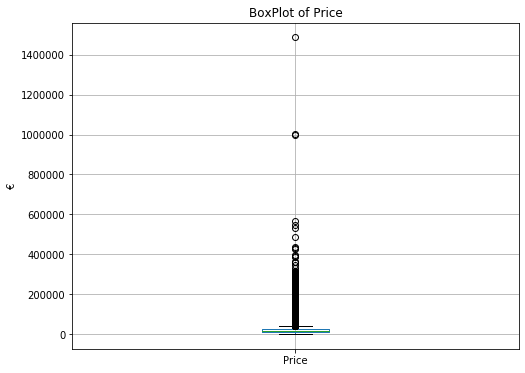

In [18]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
df.boxplot(column='Price', ax=ax)
# frame['ArrDelay'].plot.box(ax=ax) # Alternative
ax.set_title('BoxPlot of Price')
ax.set_ylabel('€')

In [19]:
pd.options.display.max_rows = 15
df.sort_values(by=['Model_year'])
df.loc[df['Model_year'] > 2020]

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description
17541,13159.0,FIAT,500,5018,2973,Diesel,mécanique,02/05/2018 à 6h54,"modele: , version: LOUNGE 1.2 69, puissance_fi..."


In [20]:
df=df.loc[df['Model_year'] < 2020]

In [21]:
df=df.loc[df['Model_year'] > 1945]

In [22]:
df.at[56,'Description']

"modele: KADJAR, version: 1.6 DCI 130 ENERGY INTENS, puissance_fiscale: 7, portes: 5.0, options: écran tactile;volant cuir;régulateur limiteur de vitesse;système de récupération d'énergie au freinage;prises audio auxiliaires;cache bagages;direction assistée;blanc nacré;rétroviseurs électriques;airbag frontal;banquette 1/3 - 2/3;vitres ar. surteintées;appui-tête conducteur réglable hauteur;commandes vocales;mixte simili cuir/tissu noir titane;vitres teintées;bacs de portes arrière;GPS;services connectés;prise audio USB;poignées ton carrosserie;régulateur de vitesse;dispositif freinage automatique;carte main libre;jantes alu;boucliers av et ar couleur caisse;phares av. de jour;phares av. de jour à LED;airbags rideaux;projecteurs antibrouillard;blanc glacier;climatisation automatique multi zone;vitres électriques;feux de freinage d'urgence;caméra de recul;banquette rabattable;appui-tête passager réglable en hauteur;filtre à pollen;interface media;rétroviseurs rabattables électriquement;po

In [23]:
df['Fiscal_Horsepower'] = df['Description'].map(lambda x : int(re.search(r'puissance_fiscale: (.*?), ',x).group(1)))
df['Fiscal_Horsepower']

0          4
1         16
2         47
3          5
4          5
          ..
166690    10
166691     8
166692     5
166693     8
166694    10
Name: Fiscal_Horsepower, Length: 166682, dtype: int64

In [24]:
df['Fiscal_Horsepower'].unique()

array([   4,   16,   47,    5,   20,    7,    6,   40,    8,   11,   32,
         15,   12,   10,    9,   17,    0,   13,   14,   24,    3,   18,
         35,    1,   29,   34,  118,   52,   19,   22,   25,   28,   23,
         41,   26,   27,   21,   37,   61,   31,   50,   48,   46,   30,
         49,   42,    2,   38,   33,   43,   44,   54,   58,   63,   56,
         57,   45,   39,   51,   36,  131,   72,   59,   70,   64,   81,
        205, 2013,   62,   53,   68,   66,   73,   75,   69,  204,  202,
        110,   65,  150,  105,  109])

In [25]:
df['doors'] = df['Description'].map(lambda x : re.search(r'portes:(.*?), ',x).group(1))
df['doors'] = df['doors'].map(lambda x: x.strip())
df['doors'] = df['doors'].map(lambda x: 7  if(x=='') else int(x[:-2]))
df['doors'].unique()

array([5, 3, 4, 2, 7, 0, 6])

In [26]:
df['Options'] = df['Description'].map(lambda x : re.search(r'options:(.*?), couleur:', x).group(1).split(';'))
df['Options_Count'] = df['Description'].map(lambda x : re.search(r'options:(.*?), couleur:', x).group(1).count(';'))
df['Couleurs'] = df['Description'].map(lambda x : re.split(r'couleur: ', x)[-1])
df['Couleurs'].unique()

array(['BLANC BANQUISE', 'Carbonschwarz metallise',
       'NOIR PANTHERE CRISTAL', ...,
       'beige opaque (verni sans reflet)   ', 'NOIR OBSIDIEN NACRE',
       'Gris poivre metallis'], dtype=object)

In [27]:
df['Age']  = df['Online'].map(lambda x : datetime.strptime(x, '%d/%m/%Y à %Hh%M'))
df['Age'] = df.apply(lambda row: row['Age'].year - int(row['Model_year']), axis=1)

In [28]:
df.head()

,Price,Make,Model,Model_year,Mileage,Fuel,Gearbox,Online,Description,Fiscal_Horsepower,doors,Options,Options_Count,Couleurs,Age
0,11220.0,PEUGEOT,308,2014,94341,Diesel,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",4,5,"[ banquette arrière 3 places, volant cuir, cac...",53,BLANC BANQUISE,4
1,57526.0,BMW,X6,2015,39051,Diesel,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",16,5,[ triangle de presignalisation et trousse de p...,40,Carbonschwarz metallise,3
2,80379.0,AUDI,RS6,2014,75381,Essence,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",47,5,"[ banquette arrière 3 places, écran tactile, t...",139,NOIR PANTHERE CRISTAL,4
3,2830.0,FORD,KA,2007,92282,Essence,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",5,3,"[ direction assistée, jantes alu, rétroviseurs...",7,JAUNE,11
4,12925.0,FIAT,TIPO,2018,10,Essence,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,5,"[ Volant alu & cuir, Bluetooth inclut musique ...",23,blanc verni,0


In [29]:
df['Fuel'].unique()

array(['Diesel', 'Essence', 'Hybride essence électrique', 'Electrique',
       'Bicarburation essence GNV', 'Hybride diesel électrique',
       'Bicarburation essence GPL', 'Bicarburation essence bioéthanol'],
      dtype=object)

In [30]:
df = df.join(pd.get_dummies(df.pop('Fuel')))
df.head()

,Price,Make,Model,Model_year,Mileage,Gearbox,Online,Description,Fiscal_Horsepower,doors,...,Couleurs,Age,Bicarburation essence GNV,Bicarburation essence GPL,Bicarburation essence bioéthanol,Diesel,Electrique,Essence,Hybride diesel électrique,Hybride essence électrique
0,11220.0,PEUGEOT,308,2014,94341,mécanique,06/07/2018 à 3h47,"modele: 308 (2E GENERATION), version: 1.6 HDI ...",4,5,...,BLANC BANQUISE,4,0,0,0,1,0,0,0,0
1,57526.0,BMW,X6,2015,39051,automatique,03/04/2018 à 16h41,"modele: X6 F16, version: (F16) XDRIVE30D 258 M...",16,5,...,Carbonschwarz metallise,3,0,0,0,1,0,0,0,0
2,80379.0,AUDI,RS6,2014,75381,automatique,30/07/2018 à 1h55,"modele: RS6 (3E GENERATION) AVANT, version: II...",47,5,...,NOIR PANTHERE CRISTAL,4,0,0,0,0,0,1,0,0
3,2830.0,FORD,KA,2007,92282,mécanique,09/07/2018 à 14h12,"modele: KA, version: 1.3 70 FUN, puissance_fis...",5,3,...,JAUNE,11,0,0,0,0,0,1,0,0
4,12925.0,FIAT,TIPO,2018,10,mécanique,19/05/2018 à 3h52,"modele: TIPO 2 SW, version: II SW 1.4 95 POP, ...",5,5,...,blanc verni,0,0,0,0,0,0,1,0,0


In [31]:
faire champ taille cillindré et nombre de chevaux CH
categoriel (modele marque) les encoder
plus de visualisation 

SyntaxError: invalid syntax (<ipython-input-31-f0336d2e2181>, line 1)